# Chapter: Input-Output Modeling - Part 1: 


## Topic: Industrial Fired Heaters: Model Identification data generation

In [1]:
# import packages 
from sippy import functionset as fset
import matplotlib.pyplot as plt
import control
import numpy as np

# package settings
np.random.seed(0)
plt.rcParams.update({'font.size': 14})
assert(control.__version__ < '0.9'), "To avoid errors, downgrade the control package to a version < 0.9.0. See https://github.com/CPCLAB-UNIPI/SIPPY/issues/48 for details."

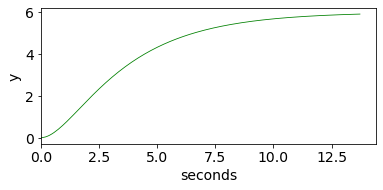

In [2]:
# define the deterministic system transfer function (https://apmonitor.com/dde/index.php/Main/FiredHeaterSimulation)
DEN_G = [3, 4, 1] 
s = control.matlab.tf('s')
sys_G  = 6/(3*s**2 + 4*s + 1)

# step response of G
yout_G, T = control.matlab.step(sys_G)

plt.figure(figsize=(6,2.5))
plt.plot(T, yout_G, 'g', linewidth=0.8)
plt.ylabel('y'), plt.xlabel('seconds'), plt.xlim(0)
plt.show()

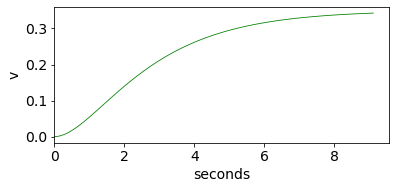

In [4]:
# define H
sys_H  = 0.35/(2*s**2 + 3*s + 1)

# step response of H
yout_H, T = control.matlab.step(sys_H)

plt.figure(figsize=(6,2.5))
plt.plot(T, yout_H, 'g', linewidth=0.8)
plt.ylabel('v'), plt.xlabel('seconds'), plt.xlim(0)
plt.show()

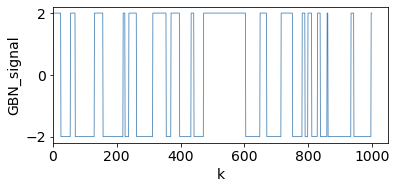

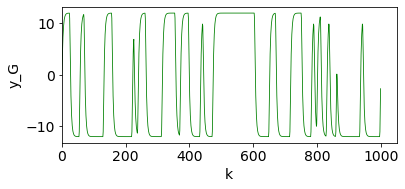

In [5]:
# design input and get G output
Time = np.linspace(0, 999, 1000)
[Usim, _, _] = fset.GBN_seq(1000, 0.1, Range=[-2, 2], Nmin=3)

plt.figure(figsize=(6,2.5))
plt.plot(Usim, 'steelblue', linewidth=0.8)
plt.ylabel('GBN_signal'), plt.xlabel('k'), plt.xlim(0)

y_G, T, _ = control.matlab.lsim(sys_G, Usim, Time)
plt.figure(figsize=(6,2.5))
plt.plot(y_G, 'g', linewidth=0.8)
plt.ylabel('y_G'), plt.xlabel('k'), plt.xlim(0)
plt.show()

SNR =  19.88153866646156


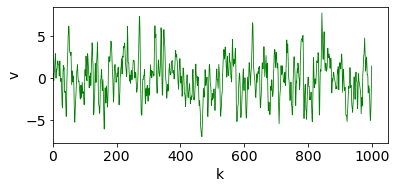

In [7]:
# generate H output for SNR = 20
# generate noise sequence
y_G_var = np.var(y_G)
white_noise_variance = [y_G_var*2.6]
e = fset.white_noise_var(Usim.size, white_noise_variance)[0]
y_H, T, _ = control.matlab.lsim(sys_H, e, Time)

# check appropriate SNR
y_H_var = np.var(y_H)
SNR = y_G_var/y_H_var
print('SNR = ', SNR)

plt.figure(figsize=(6,2.5))
plt.plot(y_H, 'g', linewidth=0.8)
plt.ylabel('v'), plt.xlabel('k'), plt.xlim(0)
plt.show()

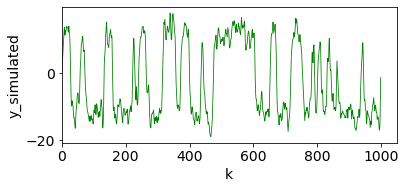

In [8]:
# combined output of simulated system
y = y_G + y_H
plt.figure(figsize=(6,2.5))
plt.plot(y, 'g', linewidth=0.8)
plt.ylabel('y_simulated'), plt.xlabel('k'), plt.xlim(0)
plt.show()

In [9]:
# save data
data = np.column_stack((Usim, y))
np.savetxt('IndustrialFiredHeater_SISO.csv', data, delimiter=',') 